In [1]:
# Imports:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import os
import time
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM


In [2]:
# Initialisation:

path_in = '/global/cfs/cdirs/lsst/groups/CS/mass_sheets/'
directory_contents = os.listdir(path_in)
print("*** original mass sheets ***")
print(directory_contents)

path_out = 'IA-infusion/SkySim5000/density/'
directory_contents = os.listdir(path_out)
print("*** new mass sheets ***")
print(directory_contents)

path_out_tidal = 'IA-infusion/SkySim5000/tidalfield/'
directory_contents = os.listdir(path_out_tidal)
print("*** tidal fields ***")
print(directory_contents)


zfile=np.loadtxt("z2ts.txt",delimiter=',')
snaplist = zfile[:,1].astype(int)
zlist=zfile[:,0]

cosmo = FlatLambdaCDM(H0=71, Om0=0.3124, Tcmb0=2.725)

#include a 0.1Mpc/h smoothing, expressed here in Mpc (not Mpc/h):
smoothing_comoving = 0.1/cosmo.h*u.Mpc
print("smoothing the field with", smoothing_comoving, "Mpc (e.g. not Mpc/h)")



*** original mass sheets ***
['README.txt', 'density_map_411_dens.bin', 'density_map_442_dens.bin', 'density_map_307_dens.bin', 'density_map_198_dens.bin', 'density_map_259_dens.bin', 'density_map_373_dens.bin', 'density_map_315_dens.bin', 'density_map_355_dens.bin', 'density_map_272_dens.bin', 'density_map_279_dens.bin', 'density_map_464_dens.bin', 'density_map_247_dens.bin', 'density_map_286_dens.bin', 'density_map_241_dens.bin', 'density_map_189_dens.bin', 'density_map_219_dens.bin', 'density_map_224_dens.bin', 'density_map_203_dens.bin', 'density_map_121_dens.bin', 'density_map_176_dens.bin', 'density_map_230_dens.bin', 'density_map_475_dens.bin', 'density_map_331_dens.bin', 'density_map_137_dens.bin', 'density_map_194_dens.bin', 'density_map_347_dens.bin', 'density_map_323_dens.bin', 'density_map_213_dens.bin', 'density_map_180_dens.bin', 'density_map_167_dens.bin', 'density_map_392_dens.bin', 'density_map_151_dens.bin', 'density_map_184_dens.bin', 'density_map_141_dens.bin', 'den

In [3]:
def compute_tidal_tensor_spherical_new(hpmap, smoothing):

    #-----------------------
    # Get alm from delta map:
    print("starting delta map2alm")
    #The input maps must all be in ring ordering.
    
    delta=np.copy(hpmap)
    
    alm_E = hp.sphtfunc.map2alm(hpmap, lmax=5000, mmax=None, iter=3, pol=False, use_weights=False, datapath=None)
    alm_B = alm_E*0.0;
    print("Done forward transform")
    
    if (smoothing > 0.0) :
        #smooth by sigma, given in radians
        print("smoothing by beam with sigma = "+np.str(smoothing)+"rad")
        alm_E_smooth=hp.sphtfunc.smoothalm(alm_E, fwhm=0.0, sigma=smoothing, beam_window=None, pol=False, mmax=None, verbose=True, inplace=True)
        alm_E = alm_E_smooth
        del alm_E_smooth
        print("Done Smoothing")
      
    print("Starting shear alm2map")
    nside=hp.get_nside(hpmap)
    start = time.time()
    maps_QU = hp.alm2map_spin((alm_E, alm_B), nside, spin=2,lmax=5000,mmax=None)
    
    print("Got QU maps")
    end = time.time()
    print(end - start)

    # In 2D cartesian, s11(k)+s22(k)=delta(k)
    # In the spherical polarization framework, we have:
    # Q is 'g1' = (t11 - t22)
    # delta is t11 + t22
    # U is 'g2' = t12
    # t11 is (Q +delta)/2
    # t22 is (delta-Q)/2
    # Need to subtract off the trace, affecting s_11 and s_22...
    
    tidal_tensor_sph = np.zeros((hp.nside2npix(nside),3),dtype=np.float32)

    #t11 
    tidal_tensor_sph[:,0] = (maps_QU[0]+delta)/2.0 - 1./3 * hpmap
    
    #t22
    tidal_tensor_sph[:,1] = (delta-maps_QU[0])/2.0 - 1./3 * hpmap
 
    #t12
    tidal_tensor_sph[:,2] = maps_QU[1]

    print("Done!")         
    
    return tidal_tensor_sph    


/tmp/ipykernel_50933/3087391616.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname = path_out+'density_map_'+np.str(snaplist[snap])+'_dens_allsky.npy'


loading map IA-infusion/SkySim5000/density/density_map_442_dens_allsky.npy
over density: -1.0 598.6483 1.4775663e-06


/tmp/ipykernel_50933/3087391616.py:21: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(binmap), nest=False)
/tmp/ipykernel_50933/3087391616.py:21: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(binmap), nest=False)


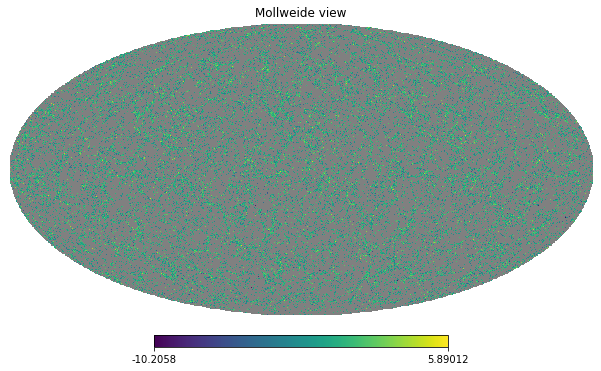

/tmp/ipykernel_50933/3087391616.py:26: RuntimeWarning: divide by zero encountered in log
  hp.cartview(np.log(binmap), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:26: RuntimeWarning: invalid value encountered in log
  hp.cartview(np.log(binmap), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:28: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  title="shell "+np.str(snap),


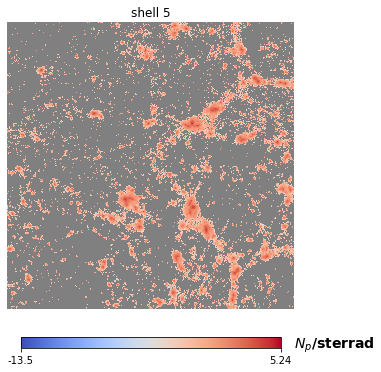

smoothing= 0.00026903583669555945  rad, = 0.9248770788255837  arcmin
starting delta map2alm
Done forward transform
smoothing by beam with sigma = 0.00026903583669555945rad


/tmp/ipykernel_50933/3900356052.py:16: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("smoothing by beam with sigma = "+np.str(smoothing)+"rad")


Done Smoothing
Starting shear alm2map
Got QU maps
124.68145442008972
Done!
Applied mask
s11: -17.477648 94.79051 0.00028216865
s22: -17.980625 113.49942 -0.00027930117
s12: -46.46488 61.40467 1.1091385e-06


/tmp/ipykernel_50933/3087391616.py:89: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(s[:,0]), nest=False)
/tmp/ipykernel_50933/3087391616.py:89: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(s[:,0]), nest=False)


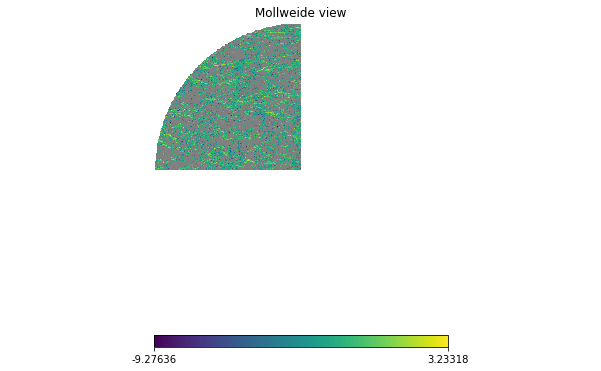

/tmp/ipykernel_50933/3087391616.py:93: RuntimeWarning: divide by zero encountered in log
  hp.cartview(np.log(s[:,0]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:93: RuntimeWarning: invalid value encountered in log
  hp.cartview(np.log(s[:,0]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:96: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  title="shell "+np.str(snap),
/tmp/ipykernel_50933/3087391616.py:102: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(s[:,1]), nest=False)
/tmp/ipykernel_50933/3087391616.py:102: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(s[:,1]), nes

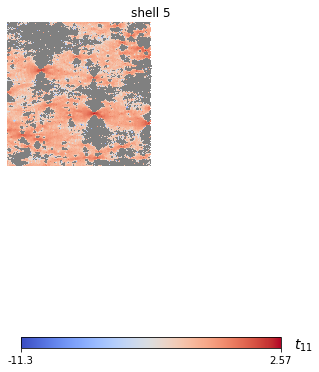

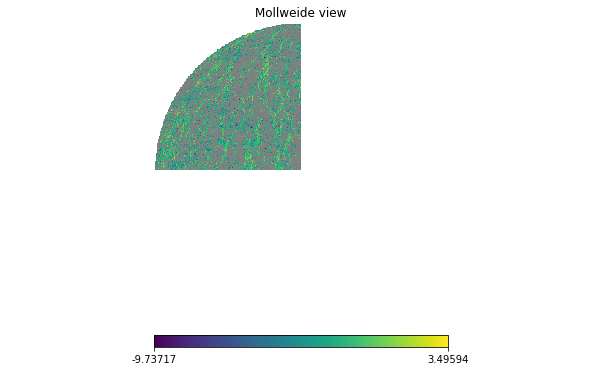

/tmp/ipykernel_50933/3087391616.py:106: RuntimeWarning: divide by zero encountered in log
  hp.cartview(np.log(s[:,1]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:106: RuntimeWarning: invalid value encountered in log
  hp.cartview(np.log(s[:,1]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:109: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  title="shell "+np.str(snap),


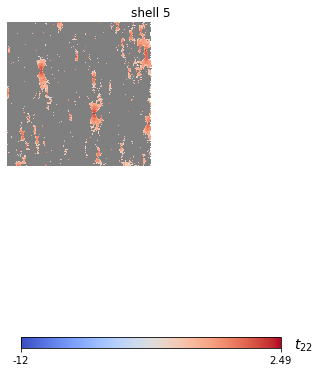

/tmp/ipykernel_50933/3087391616.py:116: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(s[:,2]), nest=False)
/tmp/ipykernel_50933/3087391616.py:116: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(s[:,2]), nest=False)


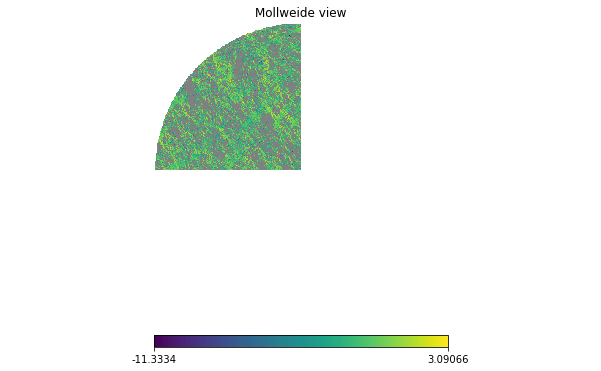

/tmp/ipykernel_50933/3087391616.py:121: RuntimeWarning: divide by zero encountered in log
  hp.cartview(np.log(s[:,2]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:121: RuntimeWarning: invalid value encountered in log
  hp.cartview(np.log(s[:,2]), cbar=True, lonra=lonra, latra=latra,
/tmp/ipykernel_50933/3087391616.py:124: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  title="shell "+np.str(snap),


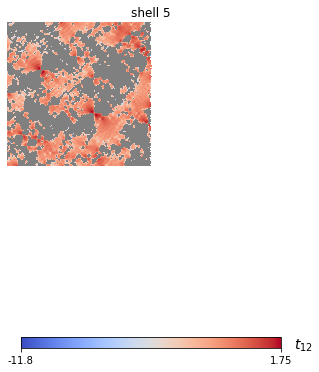

/tmp/ipykernel_50933/3087391616.py:130: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname = path_out_tidal+'tidal_field_map_'+np.str(snaplist[snap])+'_allsky_V2.npy'


Saved s


In [4]:


# Load full-sky density maps from file, compute tidal tensor, save
# Repeat for all redshifts

#for snap in range(6,58):
for snap in range(5,6):

    fname = path_out+'density_map_'+np.str(snaplist[snap])+'_dens_allsky.npy'
    print("loading map", fname)
    binmap = np.load(fname)

    # Normalize the maps correctly:       
    mean_rho = (np.mean(binmap)) # no factor of 8.0 since we have full sky data here
    binmap /= mean_rho 
    binmap -= 1
    print("over density:",np.min(binmap), np.max(binmap), np.mean(binmap))


    
    
    # Visualize:
    hp.mollview(np.log(binmap), nest=False)
    plt.show()

    lonra = [-3, 3]
    latra = [-3, 3]
    hp.cartview(np.log(binmap), cbar=True, lonra=lonra, latra=latra,
                nest=False,
                title="shell "+np.str(snap),
                # min=-10, max=0,
                cmap=plt.cm.coolwarm,            
                norm=None, unit='$N_{p}$/sterrad')
    plt.show()
    
    # convert smoothing scale to anguar scales:
    shell_distance = cosmo.comoving_distance(zlist[snap]) #expressed here in Mpc as well (not Mpc/h):
    #print(zlist[snap])
    #print(shell_distance)

    smoothing_angular = smoothing_comoving/shell_distance
    print("smoothing=", smoothing_angular, " rad, =", smoothing_angular*180/np.pi*60, " arcmin")

    s = compute_tidal_tensor_spherical_new(binmap,smoothing=smoothing_angular)
    #s11,s22,s12,g1,g2 = compute_tidal_tensor_spherical_new(binmap,smoothing=smoothing_angular)
    
    #print("s11:",np.min(s11), np.max(s11), np.mean(s11))
    #print("s22:",np.min(s22), np.max(s22), np.mean(s22))
    #print("s12:",np.min(s12), np.max(s12), np.mean(s12))
    #print("g1:",np.min(g1), np.max(g1), np.mean(g1))
    #print("g2:",np.min(g2), np.max(g2), np.mean(g2))
 
    #nside=hp.get_nside(binmap)
    
    #something is wrong with the tensor notation...
    #s = np.zeros((hp.nside2npix(nside),3),dtype=np.float32)
    #s[:,0] = s11
    #s[:,1] = s22
    #s[:,2] = s12  

    #Apply mask to select just the octant.
    fname = 'mask_allsky.npy'
    octant_mask= np.load(fname)
    
    s[:,0] *= octant_mask
    s[:,1] *= octant_mask
    s[:,2] *= octant_mask

    #s11 *= octant_mask
    #s22 *= octant_mask
    #s12 *= octant_mask

    print("Applied mask")

    print("s11:",np.min(s[:,0]), np.max(s[:,0]), np.mean(s[:,0]))
    print("s22:",np.min(s[:,1]), np.max(s[:,1]), np.mean(s[:,1]))
    print("s12:",np.min(s[:,2]), np.max(s[:,2]), np.mean(s[:,2]))

    #print("s11:",np.min(s11), np.max(s11), np.mean(s11))
    #print("s22:",np.min(s22), np.max(s22), np.mean(s22))
    #print("s12:",np.min(s12), np.max(s12), np.mean(s12))

  
    
    # Visualize:
    lonra = [-3, 3]
    latra = [-3, 3]

    #hp.mollview(np.log(s11), nest=False)
    hp.mollview(np.log(s[:,0]), nest=False)
    plt.show()


    hp.cartview(np.log(s[:,0]), cbar=True, lonra=lonra, latra=latra,
    #hp.cartview(np.log(s11), cbar=True, lonra=lonra, latra=latra,
                nest=False,
                title="shell "+np.str(snap),
                # min=-10, max=0,
                cmap=plt.cm.coolwarm,            
                norm=None, unit='$t_{11}$')


    hp.mollview(np.log(s[:,1]), nest=False)
    #hp.mollview(np.log(s22), nest=False)
    plt.show()

    hp.cartview(np.log(s[:,1]), cbar=True, lonra=lonra, latra=latra,
    #hp.cartview(np.log(s22), cbar=True, lonra=lonra, latra=latra,
                nest=False,
                title="shell "+np.str(snap),
                # min=-10, max=0,
                cmap=plt.cm.coolwarm,            
                norm=None, unit='$t_{22}$')
    plt.show()


    hp.mollview(np.log(s[:,2]), nest=False)
    #hp.mollview(np.log(s12), nest=False)
    plt.show()


    hp.cartview(np.log(s[:,2]), cbar=True, lonra=lonra, latra=latra,
    #hp.cartview(np.log(s12), cbar=True, lonra=lonra, latra=latra,
            nest=False,
                title="shell "+np.str(snap),
                # min=-10, max=0,
                cmap=plt.cm.coolwarm,            
                norm=None, unit='$t_{12}$')
    plt.show()

    fname = path_out_tidal+'tidal_field_map_'+np.str(snaplist[snap])+'_allsky_V2.npy'
    #fname = path_out_tidal+'tidal_field_map_'+np.str(snaplist[snap])+'_allsky.npy'
    np.save(fname,s)
    #with open(fname, 'wb') as f:
    #    np.save(f, s11)
    #    np.save(f, s22)
    #    np.save(f, s12)
    #    np.save(f, g1)
    #    np.save(f, g2)

    print("Saved s")

In [4]:
snap=1
fname = path_out+'tidal_field_map_'+np.str(snaplist[snap])+'_allsky_V2.npy'
with open(fname, 'rb') as f:
    s=np.load(f)
    g1=np.load(f)
    g2=np.load(f)

/tmp/ipykernel_16050/2630221125.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname = path_out+'tidal_field_map_'+np.str(snaplist[snap])+'_allsky_V2.npy'


In [5]:
print("s11:",np.min(s[:,0]), np.max(s[:,0]), np.mean(s[:,0]))
print("s22:",np.min(s[:,1]), np.max(s[:,1]), np.mean(s[:,1]))
print("s12:",np.min(s[:,2]), np.max(s[:,2]), np.mean(s[:,2]))
print("g1:",np.min(g1), np.max(g1), np.mean(g1))
print("g2:",np.min(g2), np.max(g2), np.mean(g2))
print("delta:",np.min(binmap), np.max(binmap), np.mean(binmap))
print("g2_masked:",np.min(g2*octant_mask), np.max(g2*octant_mask), np.mean(g2*octant_mask))

g2/s[:,2]

s11: 0.0 70934.734 0.13402681
s22: 0.0 82041.51 0.14940917
s12: 0.0 4575.944 0.32193124
g1: -66.22990475678283 68.35805813086183 -0.05420929253362413
g2: -67.64572507280037 54.21345300760535 -5.4375049255584505e-12


NameError: name 'binmap' is not defined

In [ ]:
# Construct temporary all-sky mass maps with healpix rotators, so that the tidal field s 
# are not critically affected by boundary effects.
# Will remask at the end


for snap in range(29,30):
    
    # Load mass sheet. Each is map is 114Mpc/.h, thick, see CosmoDC2 paper
    data_file = path_in+'density_map_'+np.str(snaplist[snap])+'_dens.bin'
    print('Working on file '+data_file)
    tmp = np.fromfile(data_file,'<f')

    # Format is nested, order into ring in order to use alm2maps transforms
    # and degrade NSIDE 
    print("NSIDE_orig=", hp.get_nside(tmp))
    binmap=hp.pixelfunc.ud_grade(tmp, 4096, pess=False, order_in='NESTED', order_out='RING', power=None, dtype=None)
    print("NSIDE_new=", hp.get_nside(binmap))

    # Or reorder, keeping all full NSIDE resolution
    #binmap = hp.reorder(tmp, n2r = True)
    #del tmp
    
    print("Got RING-ordered input map")
    
    # Replicate the Octant:
    # Note that the rotator interpolate in pixel space, which can create visible differences for sparsely sampled maps.
    # In the end, only the original octant is selected, so this has a negligible effect, except perhaps some boundary residuals.
    # We do neglect those here.
    
    # Copy the original quadrant to the south hemisphere:
    longitude = 0 * u.deg
    latitude = 90 * u.deg
    r = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)])

    #print("test rotator:")
    #print(r(0,90,lonlat=True))
    #print(r(0,0,lonlat=True))

    binmap_rot = r.rotate_map_pixel(binmap)
    print("Got rotated map")

    binmap +=binmap_rot
    print("Added")

    del binmap_rot
    print("Cleaned up")

    hp.mollview(np.log(binmap), nest=False)
    plt.show()

    ####
    # Rotate by 90, paste, then by 180 deg:
    for n in range(1,3):

        longitude = 90 * n * u.deg
        latitude = 0 * u.deg
        r = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)])

        #print("test:")
        #print(r(90 * n,0,lonlat=True))
        #print(r(0,0,lonlat=True))

        binmap_rot = r.rotate_map_pixel(binmap)
        print("Got rotated map")

        binmap +=binmap_rot
        print("Added")

        del binmap_rot
        print("Cleaned up")

        hp.mollview(np.log(binmap), nest=False)
        plt.show()

    # save to file:
    fname = path_out+'density_map_'+np.str(snaplist[snap])+'_dens_allsky.npy'
    np.save(fname, binmap)
    print("Saved")
    

In [ ]:
# Adapted from Simon Samuroff's public 3D-version on github, with his permission.
# In 2D, smoothing size to be specified in Mpc/h, and set to True or False.
# Do not smooth if the "smoothing" variable is set to 0 or to a negative value.
# 'box' and 'pixel_size' are also in Mpc/h

#2D cartesian:

def compute_tidal_tensor(dens, smoothing, pixel_size,box):

    """
    Computes the projected tidal tensor given a 2D density field
    Pixel size and smoothing scale in h^{-1} Mpc
    """
    nx = dens.shape[0]
    #dfilter = True

    norm = nx * nx

    print('pixel scale = %3.3f'%pixel_size)


    k  = npf.fftfreq(nx, d=box/nx)[np.mgrid[0:nx,0:nx]]
    tidal_tensor = np.zeros((nx,nx,2,2),dtype=np.float32)

    if (smoothing>0):
        sigma = smoothing/pixel_size
        print('filtering, sigma=%3.3f'%sigma)
        G = gaussian_filter(dens,sigma,mode='wrap')

    else:
        print('not filtering')
        G = dens + 1

    fft_dens = npf.fftn(G) / norm # 2D (512 x 512) grid ; each cell is a k mode

    # Compute the elements of the tensor
    for i in range(2):
        for j in range(2):


            if (j>i):
                #Skip this element, since j_ij is symmetric under i <-> j
                #Will copy instead the results from the [1,0] elements
                print('Not computing', i,j,', will use symmetry properties instead')
                continue
            else:
                print('Launching computation for s_ij with i,j=', i,j)

            # k[i], k[j] are 2D matrices
            temp = fft_dens * k[i]*k[j]/(k[0]**2 + k[1]**2)

            # Make the 3D tidal tensor trace free.
            if (i==j):
                temp -= 1./3 * fft_dens

            # suppress DC modes
            temp[0,0] = 0
            tidal_tensor[:,:,i,j] = npf.ifftn(temp).real * norm /nx

    # Apply symmetry:
    tidal_tensor[:,:,0,1] = tidal_tensor[:,:,1,0]

    return tidal_tensor

In [ ]:
# Make mask file, from a density file that is well sampled (e.g. not too close to z=0)
# to avoid empty pixels being treated as masks.
for snap in range(20,21):
    data_file = path_in+'density_map_'+np.str(snaplist[snap])+'_dens.bin'
    print('Working on file '+data_file)
    tmp = np.fromfile(data_file,'<f')

    # Format is nested, order into ring in order to use alm2maps transforms
    # and degrade NSIDE 
    print("NSIDE_orig=", hp.get_nside(tmp))
    binmap=hp.pixelfunc.ud_grade(tmp, 4096, pess=False, order_in='NESTED', order_out='RING', power=None, dtype=None)
    print("NSIDE_new=", hp.get_nside(binmap))
    
#mask = np.ma.masked_where(binmap>0.0,binmap)
#hp.mollview(mask.mask, nest=False)
#plt.show()

fname = 'mask_allsky.npy'
np.save(fname, mask.mask)
print("Saved mask")

tmp = np.load(fname)
hp.mollview(tmp, nest=False)
plt.show()

In [ ]:
#smooth the density field:
for snap in range(2,59):
    fname = path_out+"density_map_"+str(snaplist[snap])+"_dens_allsky.npy"
    print("opening ", fname) 
    hpmap_density = np.load(fname)
    print("Got density file!")

    # Smooth the density field:
    #include a 0.1Mpc/h smoothing, expressed here in Mpc (not Mpc/h):
    smoothing_comoving = 0.1/cosmo.h*u.Mpc
    print("smoothing the field with", smoothing_comoving, " (e.g. not Mpc/h)")

    # convert smoothing scale to anguar scales:
    shell_distance = cosmo.comoving_distance(zlist[snap]) #expressed here in Mpc as well (not Mpc/h):
    #print(zlist[snap])
    #print(shell_distance)

    smoothing_angular = smoothing_comoving/shell_distance
    print("smoothing=", smoothing_angular, " rad, =", smoothing_angular*180/np.pi*60, " arcmin")
    map_smooth=hp.sphtfunc.smoothing(hpmap_density, fwhm=0.0, sigma=smoothing_angular, beam_window=None, pol=False, mmax=None, verbose=True)
    print("Done Smoothing")
    # save to file:
    fname = path_out+'density_map_'+np.str(snaplist[snap])+'_dens_allsky_smooth.npy'
    np.save(fname, map_smooth)
    print("Saved")






opening  IA-infusion/SkySim5000/density/density_map_475_dens_allsky.npy
Got density file!
smoothing the field with 0.14084507042253522 Mpc  (e.g. not Mpc/h)
smoothing= 0.0006724558842168926  rad, = 2.3117330444619535  arcmin
